In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import tensorflow as tf

In [2]:
pip install wfdb scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.3/162.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 102.6 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [3]:
import os
for dirname, _, filenames in os.walk('D:\Data\DataSet'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
df_train=pd.read_csv('mitbih_train.csv',header=None)
print(df_train.shape)
df_train.head()

(87554, 188)


0         1         2         3         4         5         6    \
0  0.977941  0.926471  0.681373  0.245098  0.154412  0.191176  0.151961   
1  0.960114  0.863248  0.461538  0.196581  0.094017  0.125356  0.099715   
2  1.000000  0.659459  0.186486  0.070270  0.070270  0.059459  0.056757   
3  0.925414  0.665746  0.541436  0.276243  0.196133  0.077348  0.071823   
4  0.967136  1.000000  0.830986  0.586854  0.356808  0.248826  0.145540   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.085784  0.058824  0.049020  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.088319  0.074074  0.082621  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.043243  0.054054  0.045946  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.060773  0.066298  0.058011  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.089202  0.117371  0.150235  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 188 columns]

In [5]:
df_test=pd.read_csv('mitbih_test.csv',header = None)
print(df_test.shape)
df_test.head()

(21892, 188)


0         1         2         3         4         5         6    \
0  1.000000  0.758264  0.111570  0.000000  0.080579  0.078512  0.066116   
1  0.908425  0.783883  0.531136  0.362637  0.366300  0.344322  0.333333   
2  0.730088  0.212389  0.000000  0.119469  0.101770  0.101770  0.110619   
3  1.000000  0.910417  0.681250  0.472917  0.229167  0.068750  0.000000   
4  0.570470  0.399329  0.238255  0.147651  0.000000  0.003356  0.040268   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.049587  0.047521  0.035124  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.307692  0.296703  0.300366  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.123894  0.115044  0.132743  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.004167  0.014583  0.054167  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.080537  0.070470  0.090604  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1  0.0  0.0  
2  0.0  0.0  
3  0.0  0.0  
4  0.0  0.0  

[5 rows x 188 columns]

(87554, 188)
(87554, 187)
        0         1         2         3         4         5         6    \
0  0.064606 -0.128901 -0.324482 -0.505984 -0.646774 -0.733133 -0.773988   
1  0.069341 -0.179241 -0.408851 -0.594874 -0.716747 -0.772919 -0.782172   
2  0.112837 -0.260834 -0.564046 -0.755168 -0.835626 -0.840707 -0.814547   
3  0.069019 -0.151946 -0.354794 -0.523620 -0.647406 -0.723088 -0.756940   
4  0.103998  0.026533 -0.087238 -0.244633 -0.419550 -0.572296 -0.673799   

        7         8         9    ...       178       179       180       181  \
0 -0.789309 -0.794519 -0.795476  ... -0.022031 -0.020402 -0.018833 -0.017323   
1 -0.770463 -0.757216 -0.750536  ... -0.022366 -0.020754 -0.019200 -0.017703   
2 -0.788416 -0.774025 -0.769127  ... -0.012778 -0.011452 -0.010189 -0.008989   
3 -0.762026 -0.752551 -0.738666  ... -0.018302 -0.016845 -0.015446 -0.014103   
4 -0.717678 -0.717692 -0.696325  ... -0.031013 -0.029174 -0.027384 -0.025646   

        182       183       184       185 

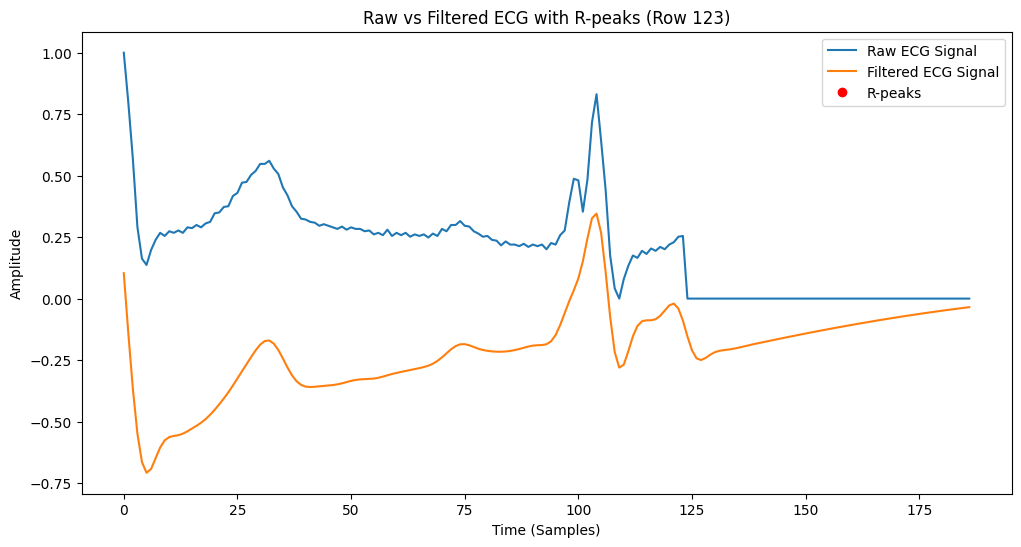

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

# Load the dataset
df_train = pd.read_csv('mitbih_train.csv', header=None)
print(df_train.shape)
df_train.head()

# Function to apply bandpass filtering
def bandpass_filter(signal, lowcut=0.5, highcut=50.0, fs=360, order=3):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    df = filtfilt(b, a, signal)  # Store filtered signal in 'df' variable
    return df

# Apply the bandpass filter to all rows in df_train (except the last column, which is likely the label)
filtered_signals = df_train.iloc[:, :-1].apply(lambda row: bandpass_filter(row.values), axis=1)

# Create a new DataFrame `df` to hold the filtered signals
df = pd.DataFrame(filtered_signals.tolist())

# Print the shape of the new DataFrame to confirm it matches df_train (excluding the label column)
print(df.shape)

# Optionally add the labels back if needed
labels = df_train.iloc[:, -1]  # Extract the labels (last column of df_train)
df[187] = labels  # Add the labels as a new column with column name 188

# Check the head of the filtered DataFrame
print(df.head())

# Plotting the filtered signal for a chosen row
signal_index = 122  # Change this variable to choose a different signal from the dataset
ecg_signal = df_train.iloc[signal_index, :-1].values  # Take the specified row as an example

# Apply filtering to the signal for plotting
df_filtered = bandpass_filter(ecg_signal)

# Detect R-peaks in the filtered signal
r_peaks, _ = find_peaks(df_filtered, height=0.5, distance=50)

# Plot the filtered signal with detected R-peaks
plt.figure(figsize=(12, 6))
plt.plot(ecg_signal, label='Raw ECG Signal')
plt.plot(df_filtered, label='Filtered ECG Signal')
plt.plot(r_peaks, df_filtered[r_peaks], 'ro', label='R-peaks')
plt.title(f'Raw vs Filtered ECG with R-peaks (Row {signal_index + 1})')
plt.xlabel('Time (Samples)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


In [7]:
df.shape

(87554, 188)

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB


In [9]:
df.columns = df.columns.astype(int)
df_test.columns = df_test.columns.astype(int)


In [10]:
df[187] = df[187].astype('int64')
target_col = df[187]
df_test[187] = df_test[187].astype('int64')
test_target_col = df_test[187]
labels =  ['Normal Beat','Supraventricular premature beat','Premature\nventricular contraction','Fusion of ventricular and normal beat','Unclassified']

In [11]:
print(f"Shape of df: {df.shape}")
print(f"Shape of df_test: {df_test.shape}")


Shape of df: (87554, 188)
Shape of df_test: (21892, 188)


In [12]:
pd.Series(np.bincount(target_col),index=labels)

Normal Beat                              72471
Supraventricular premature beat           2223
Premature\nventricular contraction        5788
Fusion of ventricular and normal beat      641
Unclassified                              6431
dtype: int64

In [13]:
target_col

0        0
1        0
2        0
3        0
4        0
        ..
87549    4
87550    4
87551    4
87552    4
87553    4
Name: 187, Length: 87554, dtype: int64

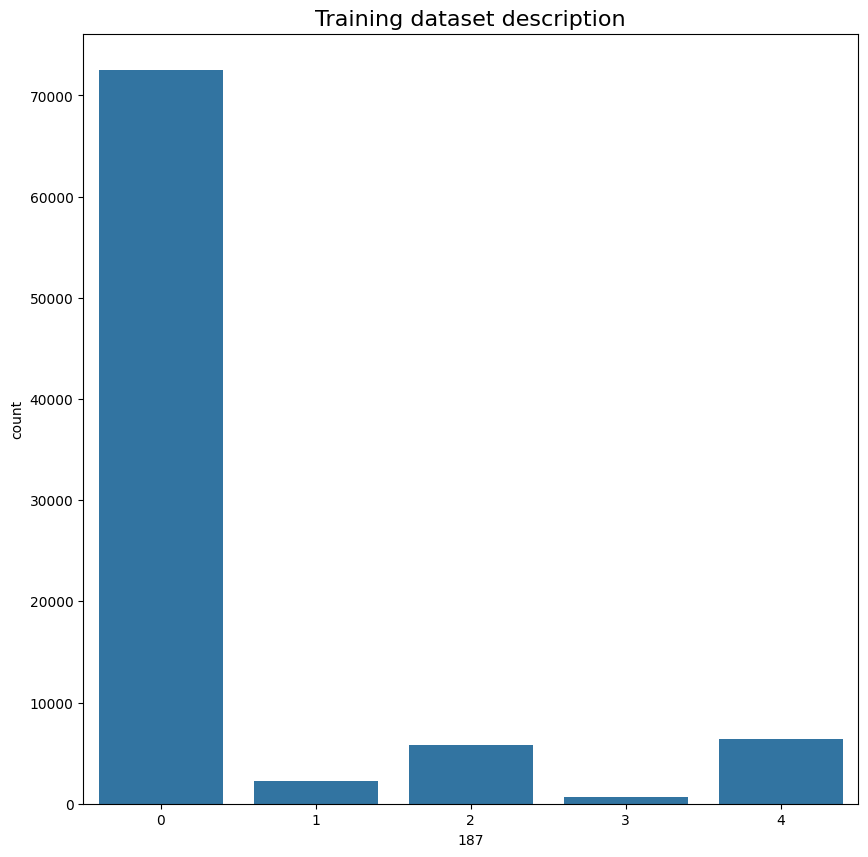

In [14]:
plt.figure(figsize=(10,10))
sns.countplot(x=df[187])
plt.title("Training dataset description",fontsize=16)
plt.savefig('TrainingDataSet.png')

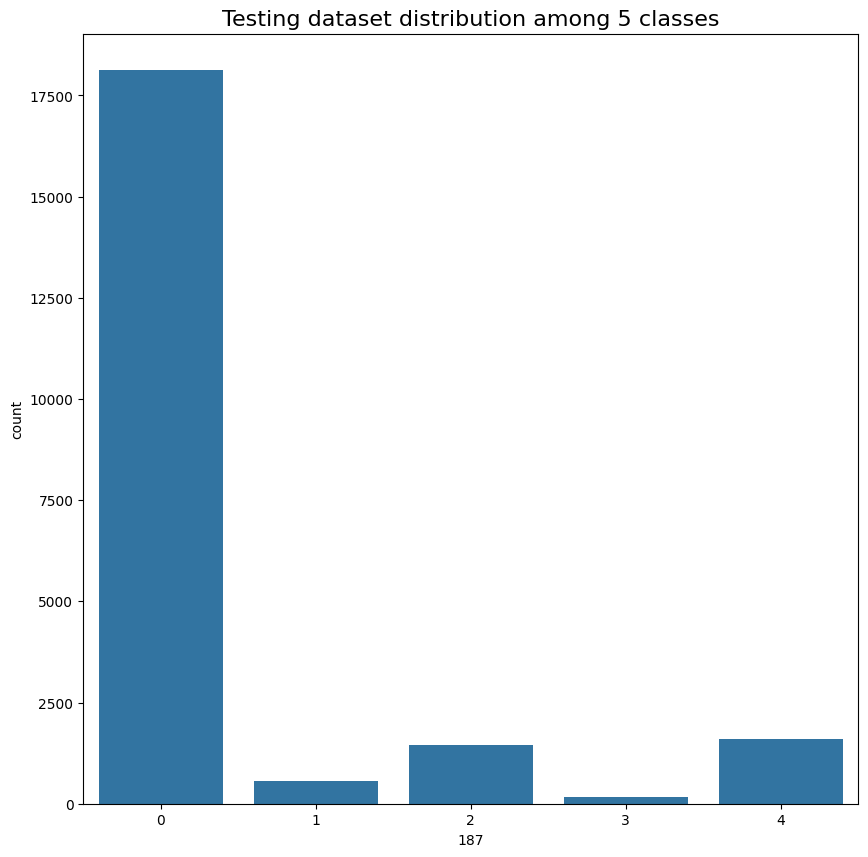

In [15]:
plt.figure(figsize=(10,10))
sns.countplot(x=df_test[187])
plt.title("Testing dataset distribution among 5 classes",fontsize=16)
plt.savefig('TestingDataSet.png')

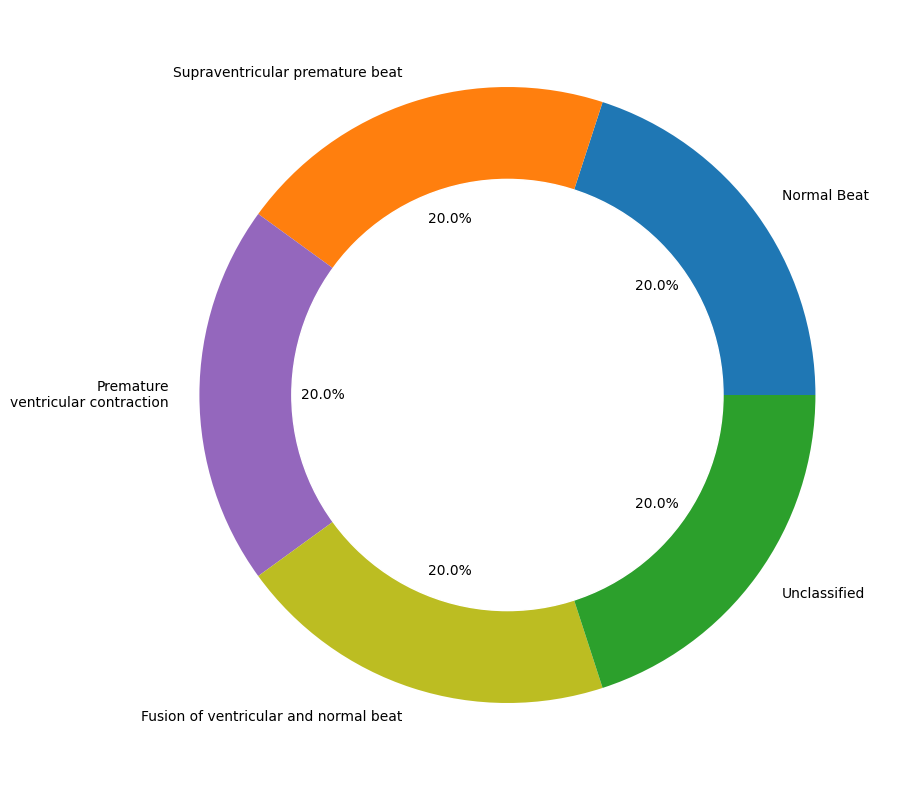

In [16]:
from sklearn.utils import resample
df_1=df[df[187]==1]
df_2=df[df[187]==2]
df_3=df[df[187]==3]
df_4=df[df[187]==4]
df_0=(df[df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])
# representation of classes % wise
per_class = df[187].value_counts()
plt.figure(figsize=(10,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(per_class, labels=labels, colors=['tab:blue','tab:orange','tab:purple','tab:olive','tab:green'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.savefig('BalancedDataSet.png')

In [17]:
pd.Series(np.bincount(test_target_col),index=labels)

Normal Beat                              18118
Supraventricular premature beat            556
Premature\nventricular contraction        1448
Fusion of ventricular and normal beat      162
Unclassified                              1608
dtype: int64

In [18]:
X = df.drop(187,axis=1)
y = df[187]
print(X.shape)
print(y.shape)
x_test = df_test.drop(187,axis=1)
y_test = df_test[187].astype('int64')
print(x_test.shape)
print(y_test.shape)

(100000, 187)
(100000,)
(21892, 187)
(21892,)


In [19]:
C0 = (target_col==0)
C1 = (target_col==1)
C2 = (target_col==2)
C3 = (target_col==3)
C4 = (target_col==4)

# 80-20

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(X,y.values,random_state=42,stratify=y.values,shuffle=True,train_size=0.80)
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)

(80000, 187) (80000,)
(20000, 187) (20000,)


In [21]:
pd.Series(np.bincount(y_train),index=labels)

Normal Beat                              16000
Supraventricular premature beat          16000
Premature\nventricular contraction       16000
Fusion of ventricular and normal beat    16000
Unclassified                             16000
dtype: int64

In [22]:
pd.Series(np.bincount(y_val),index=labels)

Normal Beat                              4000
Supraventricular premature beat          4000
Premature\nventricular contraction       4000
Fusion of ventricular and normal beat    4000
Unclassified                             4000
dtype: int64

In [23]:
pd.Series(np.bincount(y_test),index=labels)

Normal Beat                              18118
Supraventricular premature beat            556
Premature\nventricular contraction        1448
Fusion of ventricular and normal beat      162
Unclassified                              1608
dtype: int64

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

In [25]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)
y_test = tf.keras.utils.to_categorical(y_test)
x_train = np.expand_dims(x_train,2)
x_val = np.expand_dims(x_val,2)
x_test = np.expand_dims(x_test,2)
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(80000, 187, 1) (80000, 5)
(20000, 187, 1) (20000, 5)
(21892, 187, 1) (21892, 5)


In [26]:
from keras.models import Model
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, Softmax, Add, Flatten, Activation, Dropout, BatchNormalization,ZeroPadding1D,AveragePooling1D
from keras import backend as K
from keras import Sequential
from keras.initializers import glorot_uniform

In [27]:
n_obs, feature , depth = x_train.shape
batch_size = 256

In [28]:
def identity_block(X,f,filters,stage,block):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'


    F1,F2,F3 = filters
    X_shortcut = X


    X = Conv1D(filters=F1,kernel_size=1,strides=1,padding='valid',name = conv_name_base+'2a',kernel_initializer= glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2,name=bn_name_base+'2a')(X)
    X = Activation('relu')(X)


    X = Conv1D(filters=F2,kernel_size=1,strides=1,padding='same',name = conv_name_base+'2b',kernel_initializer= glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2,name=bn_name_base+'2b')(X)
    X = Activation('relu')(X)


    X = Conv1D(filters=F3,kernel_size=1,strides=1,padding='valid',name = conv_name_base+'2c',kernel_initializer= glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2,name=bn_name_base+'2c')(X)

    X = Add()([X,X_shortcut])
    X = Activation('relu')(X)

    return X

In [29]:
def convolutional_block(X, f, filters, stage, block, s=2):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1,F2,F3 = filters
    X_shortcut = X
    X = Conv1D(filters=F1,kernel_size=1,strides=s,padding='valid',name = conv_name_base+'2a',kernel_initializer= glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2,name=bn_name_base+'2a')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F2,kernel_size=f,strides=1,padding='same',name = conv_name_base+'2b',kernel_initializer= glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2,name=bn_name_base+'2b')(X)
    X = Activation('relu')(X)

    X = Conv1D(filters=F3,kernel_size=1,strides=1,padding='valid',name = conv_name_base+'2c',kernel_initializer= glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2,name=bn_name_base+'2c')(X)

    X_shortcut = Conv1D(filters=F3,kernel_size=1,strides=s,padding='valid',name =conv_name_base+'1',kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=2, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X,X_shortcut])
    X = Activation('relu')(X)

    return X

In [30]:
def ResNet(input_shape=(feature,depth)):
    X_input = Input(input_shape)
    X = ZeroPadding1D(3)(X_input)
    X = Conv1D(64,7,strides=2,name='conv1',kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=2, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling1D(3,strides=2)(X)

    X = convolutional_block(X,f=3,filters=[128,128,256],stage=2,block='a',s=1)
    X = identity_block(X,3,[128,128,256],stage=2,block='b')
    X = identity_block(X,3,[128,128,256],stage=2,block='c')

    X = convolutional_block(X,f=3,filters=[128,128,512],stage=3,block='a',s=2)
    X = identity_block(X,3,[128,128,512],stage=3,block='b')
    X = identity_block(X,3,[128,128,512],stage=3,block='c')
    X = identity_block(X,3,[128,128,512],stage=3,block='d')

    X = convolutional_block(X,f=3,filters=[256,256,1024],stage=4,block='a',s=2)
    X = identity_block(X,3,[256,256,1024],stage=4,block='b')
    X = identity_block(X,3,[256,256,1024],stage=4,block='c')
    X = identity_block(X,3,[256,256,1024],stage=4,block='d')
    X = identity_block(X,3,[256,256,1024],stage=4,block='e')
    X = identity_block(X,3,[256,256,1024],stage=4,block='f')

    X = convolutional_block(X,f=3,filters=[512,512,2048],stage=5,block='a',s=2)
    X = identity_block(X,3,[512,512,2048],stage=5,block='b')
    X = identity_block(X,3,[512,512,2048],stage=5,block='c')

    X = AveragePooling1D(pool_size = 2,padding='same')(X)

    model = Model(inputs=X_input,outputs=X,name='ResNet')

    return model

In [31]:
base_model = ResNet(input_shape=(feature,depth))

In [32]:
headModel = base_model.output
headModel = Flatten()(headModel)
headModel = Dense(256, activation='relu',name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense(128, activation='relu',name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense(5, activation='softmax',name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [33]:
model = Model(inputs=base_model.input,outputs=headModel)

In [34]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 187, 1)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding1d            │ (None, 193, 1)         │              0 │ input_layer[0][0]      │
│ (ZeroPadding1D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1 (Conv1D)            │ (None, 94, 64)         │            512 │ zero_padding1d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_conv1                  │ (None, 94, 64)         │            256 │ conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 94, 64)         │              0 │ bn_conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 46, 64)         │              0 │ activation[0][0]       │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res2a_branch2a (Conv1D)   │ (None, 46, 128)        │          8,320 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn2a_branch2a             │ (None, 46, 128)        │            512 │ res2a_branch2a[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 46, 128)        │              0 │ bn2a_branch2a[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res2a_branch2b (Conv1D)   │ (None, 46, 128)        │         49,280 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn2a_branch2b             │ (None, 46, 128)        │            512 │ res2a_branch2b[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 46, 128)        │              0 │ bn2a_branch2b[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res2a_branch2c (Conv1D)   │ (None, 46, 256)        │         33,024 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ res2a_branch1 (Conv1D)    │ (None, 46, 256)        │         16,640 │ max_pooling1d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn2a_branch2c             │ (None, 46, 256)        │          1,024 │ res2a_branch2c[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn2a_branch1              │ (None, 46, 256)        │          1,024 │ res2a_branch1[0][0]    │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 15,971,333 (60.93 MB)

 Trainable params: 15,917,445 (60.72 MB)

 Non-trainable params: 53,888 (210.50 KB)

In [35]:
from keras.metrics import AUC, Accuracy

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[AUC(name="auc"), 'accuracy'])

In [36]:
import keras

h = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20, batch_size=batch_size,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, mode='max'),
        keras.callbacks.ModelCheckpoint('./model_{val_accuracy:.3f}.h5',
                                        save_best_only=True, save_weights_only=False,
                                        monitor='val_accuracy', mode='max')
    ]
)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.7915 - auc: 0.9395 - loss: 0.2559

313/313 ━━━━━━━━━━━━━━━━━━━━ 144s 241ms/step - accuracy: 0.7918 - auc: 0.9396 - loss: 0.2555 - val_accuracy: 0.4644 - val_auc: 0.7633 - val_loss: 0.5147
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.9456 - auc: 0.9919 - loss: 0.0595

313/313 ━━━━━━━━━━━━━━━━━━━━ 78s 137ms/step - accuracy: 0.9456 - auc: 0.9919 - loss: 0.0595 - val_accuracy: 0.9419 - val_auc: 0.9894 - val_loss: 0.0657
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.9635 - auc: 0.9949 - loss: 0.0408

313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 142ms/step - accuracy: 0.9635 - auc: 0.9949 - loss: 0.0408 - val_accuracy: 0.9595 - val_auc: 0.9928 - val_loss: 0.0448
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.9740 - auc: 0.9962 - loss: 0.0297

313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 147ms/step - accuracy: 0.9740 - auc: 0.9962 - loss: 0.0297 - val_accuracy: 0.9678 - val_auc: 0.9939 - val_loss: 0.0379
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 138ms/step - accuracy: 0.9753 - auc: 0.9963 - loss: 0.0289 - val_accuracy: 0.9616 - val_auc: 0.9928 - val_loss: 0.0432
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 139ms/step - accuracy: 0.9813 - auc: 0.9971 - loss: 0.0219 - val_accuracy: 0.9324 - val_auc: 0.9887 - val_loss: 0.0690
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9829 - auc: 0.9974 - loss: 0.0202

313/313 ━━━━━━━━━━━━━━━━━━━━ 85s 148ms/step - accuracy: 0.9829 - auc: 0.9974 - loss: 0.0202 - val_accuracy: 0.9681 - val_auc: 0.9910 - val_loss: 0.0444
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9845 - auc: 0.9977 - loss: 0.0181

313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 141ms/step - accuracy: 0.9845 - auc: 0.9977 - loss: 0.0181 - val_accuracy: 0.9829 - val_auc: 0.9960 - val_loss: 0.0210
Epoch 9/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 138ms/step - accuracy: 0.9875 - auc: 0.9978 - loss: 0.0150 - val_accuracy: 0.9822 - val_auc: 0.9969 - val_loss: 0.0197
Epoch 10/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 138ms/step - accuracy: 0.9881 - auc: 0.9983 - loss: 0.0136 - val_accuracy: 0.9816 - val_auc: 0.9974 - val_loss: 0.0206
Epoch 11/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9900 - auc: 0.9982 - loss: 0.0124

313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 141ms/step - accuracy: 0.9900 - auc: 0.9982 - loss: 0.0124 - val_accuracy: 0.9831 - val_auc: 0.9965 - val_loss: 0.0212
Epoch 12/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 139ms/step - accuracy: 0.9884 - auc: 0.9983 - loss: 0.0137 - val_accuracy: 0.9828 - val_auc: 0.9964 - val_loss: 0.0210
Epoch 13/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 138ms/step - accuracy: 0.9794 - auc: 0.9963 - loss: 0.0278 - val_accuracy: 0.9804 - val_auc: 0.9959 - val_loss: 0.0252
Epoch 14/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9874 - auc: 0.9979 - loss: 0.0157

313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 141ms/step - accuracy: 0.9874 - auc: 0.9979 - loss: 0.0157 - val_accuracy: 0.9833 - val_auc: 0.9960 - val_loss: 0.0208
Epoch 15/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9912 - auc: 0.9984 - loss: 0.0110

313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 141ms/step - accuracy: 0.9912 - auc: 0.9984 - loss: 0.0110 - val_accuracy: 0.9898 - val_auc: 0.9978 - val_loss: 0.0130
Epoch 16/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 138ms/step - accuracy: 0.9929 - auc: 0.9987 - loss: 0.0087 - val_accuracy: 0.9841 - val_auc: 0.9966 - val_loss: 0.0196
Epoch 17/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9924 - auc: 0.9986 - loss: 0.0097

313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 142ms/step - accuracy: 0.9924 - auc: 0.9986 - loss: 0.0097 - val_accuracy: 0.9911 - val_auc: 0.9981 - val_loss: 0.0116
Epoch 18/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 138ms/step - accuracy: 0.9927 - auc: 0.9988 - loss: 0.0091 - val_accuracy: 0.9785 - val_auc: 0.9952 - val_loss: 0.0264
Epoch 19/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 138ms/step - accuracy: 0.9929 - auc: 0.9989 - loss: 0.0086 - val_accuracy: 0.9887 - val_auc: 0.9981 - val_loss: 0.0138
Epoch 20/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 139ms/step - accuracy: 0.9949 - auc: 0.9992 - loss: 0.0063 - val_accuracy: 0.9872 - val_auc: 0.9969 - val_loss: 0.0169


In [37]:
# Extract the highest accuracy from training history
best_accuracy = max(h.history['accuracy'])  # If you want training accuracy
best_val_accuracy = max(h.history.get('val_accuracy', [0]))  # For validation accuracy

print(f"Highest Training Accuracy: {best_accuracy:.4f}")
print(f"Highest Validation Accuracy: {best_val_accuracy:.4f}")


Highest Training Accuracy: 0.9944
Highest Validation Accuracy: 0.9911


In [38]:
h.history.keys()

dict_keys(['accuracy', 'auc', 'loss', 'val_accuracy', 'val_auc', 'val_loss'])

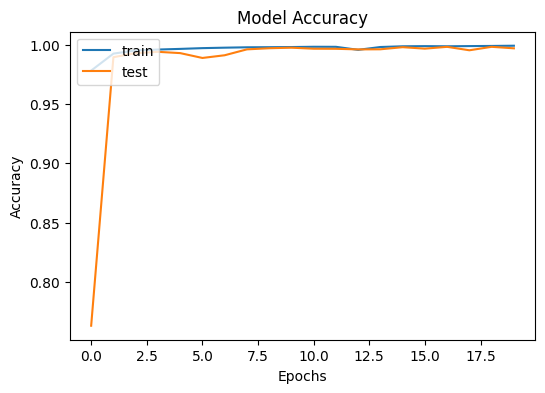

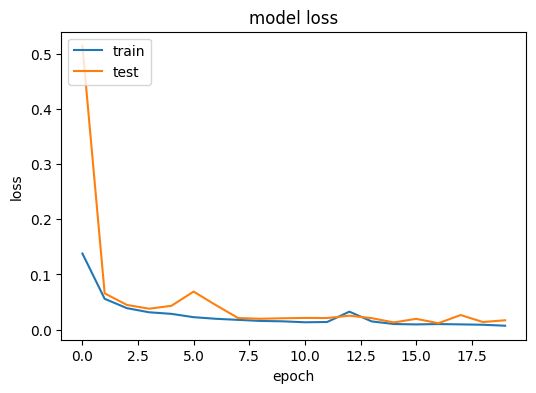

In [39]:
plt.style.use("default")
plt.figure(figsize=(6,4))
plt.plot(h.history['auc'])
plt.plot(h.history['val_auc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()
plt.figure(figsize=(6,4))
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get predictions (probabilities)
y_pred_probs = model.predict(x_val)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)  # Pick class with highest probability
y_true = np.argmax(y_val, axis=1)  # Convert one-hot encoded y_val to labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(5), yticklabels=range(5))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step


In [41]:
# Compute Metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

# Print Metrics
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ F1-Score: {f1:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall: {recall:.4f}")

✅ Accuracy: 0.9871
✅ F1-Score: 0.9871
✅ Precision: 0.9872
✅ Recall: 0.9871
